In [211]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms

In [212]:
# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [213]:
#Dataset to tensor transform object
transform = transforms.Compose([transforms.ToTensor()])

#Loading train and test set and making train/testloader objects for training/testing with batch size
batch_size = 128
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)


train_X = torch.stack([trainset[i][0] for i in range(len(trainset))]).to(device)
train_y = torch.tensor([trainset[i][1] for i in range(len(trainset))]).to(device)

test_X = torch.stack([testset[i][0] for i in range(len(testset))]).to(device)
test_y = torch.tensor([testset[i][1] for i in range(len(testset))]).to(device)

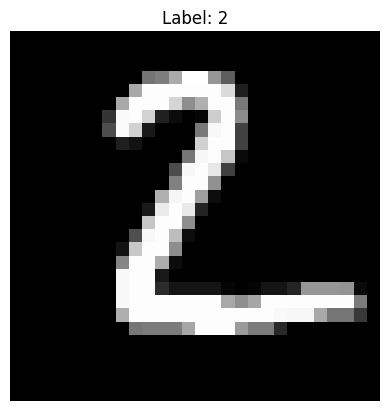

In [214]:
image, label = testset[1]

plt.imshow(image.squeeze(), cmap='gray')
plt.title(f'Label: {label}')
plt.axis('off')
plt.show()

In [215]:
print(image.shape)



torch.Size([1, 28, 28])


In [216]:
class CNN(nn.Module):
    def __init__(self, input_size = 28*28, output_size = 10, hidden_size=128,ker_size = 3, out_chan=16):
        super(CNN,self).__init__()

        self.conv1 = nn.Conv2d(in_channels=1,out_channels=out_chan,kernel_size=ker_size)

        self.pool = nn.MaxPool2d(2,2)

        self.fc1 = nn.Linear(2704,hidden_size)
        print(out_chan*((input_size-ker_size+1)//2)**2)
        self.fc2 = nn.Linear(hidden_size, output_size)
        
        self.dropout = nn.Dropout(0.5)

    def forward(self,x):

        x = self.pool(F.relu(self.conv1(x)))

        
        x = torch.flatten(x,1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        return x

In [217]:
model = CNN()
model.to(device)

2446096


CNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2704, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [ ]:

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)




In [219]:
Xs = trainset.data.float()
Xs = torch.reshape(Xs,(60000,1,28,28))
print(Xs.shape)
Xs = Xs.to(device)
ys = trainset.targets
ys = F.one_hot(ys,10).float()
ys = ys.to(device)

torch.Size([60000, 1, 28, 28])


In [220]:

epochs = 100
for epoch in range(epochs):
    model.train()
    running_loss = 0
    for i in range(0, len(train_X), batch_size):
        # Get the batch
        batch_X = train_X[i:i + batch_size]
        batch_y = train_y[i:i + batch_size]

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Track running loss
        running_loss += loss.item()

    avg_loss = running_loss / (len(train_X) / batch_size)
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}")


Epoch 1/100, Loss: 0.4915
Epoch 2/100, Loss: 0.2180
Epoch 3/100, Loss: 0.1552
Epoch 4/100, Loss: 0.1220
Epoch 5/100, Loss: 0.1062
Epoch 6/100, Loss: 0.0930
Epoch 7/100, Loss: 0.0839
Epoch 8/100, Loss: 0.0764
Epoch 9/100, Loss: 0.0700
Epoch 10/100, Loss: 0.0646
Epoch 11/100, Loss: 0.0595
Epoch 12/100, Loss: 0.0560
Epoch 13/100, Loss: 0.0534
Epoch 14/100, Loss: 0.0479
Epoch 15/100, Loss: 0.0489
Epoch 16/100, Loss: 0.0448
Epoch 17/100, Loss: 0.0423
Epoch 18/100, Loss: 0.0404
Epoch 19/100, Loss: 0.0391
Epoch 20/100, Loss: 0.0360
Epoch 21/100, Loss: 0.0347
Epoch 22/100, Loss: 0.0338
Epoch 23/100, Loss: 0.0331
Epoch 24/100, Loss: 0.0318
Epoch 25/100, Loss: 0.0298
Epoch 26/100, Loss: 0.0288
Epoch 27/100, Loss: 0.0297
Epoch 28/100, Loss: 0.0260
Epoch 29/100, Loss: 0.0248
Epoch 30/100, Loss: 0.0252
Epoch 31/100, Loss: 0.0249
Epoch 32/100, Loss: 0.0241
Epoch 33/100, Loss: 0.0223
Epoch 34/100, Loss: 0.0237
Epoch 35/100, Loss: 0.0223
Epoch 36/100, Loss: 0.0221
Epoch 37/100, Loss: 0.0219
Epoch 38/1

In [221]:
# 5. Evaluate the model
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():  # Disable gradient computation for evaluation
    for i in range(0, len(test_X), batch_size):
        # Get the batch
        batch_X = test_X[i:i + batch_size]
        batch_y = test_y[i:i + batch_size]

        # Forward pass
        outputs = model(batch_X)
        _, predicted = torch.max(outputs, 1)
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on the test set: {accuracy:.2f}%')

Accuracy on the test set: 98.69%


In [ ]:
from PIL import Image

im = Image.open("3.png")

transform = transforms.Compose([transforms.PILToTensor()])

imTensor =  transform(im)

In [ ]:
imTensor  = imTensor.reshape(3,1,28,28)
imTensor = imTensor.float()
imTensor.shape
imTensor = imTensor.to(device)

In [ ]:
a = model(imTensor)

In [229]:
torch.argmax(a,dim = 1)

tensor([3, 3, 3], device='cuda:0')

In [232]:
torch.save(model.state_dict(),"./weights/model.pt")